# FEATURE SELECTION USING MUTUAL INFORMATION GAIN
AIM: Measures the mutual dependence between the two variables. Estimate mutual information for a continuous target variable.

Read: https://en.wikipedia.org/wiki/Mutual_information
      
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html

In [1]:
import pandas as pd
import numpy as np
# importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# importing train_test_split
from sklearn.model_selection import train_test_split
# importing warnings
import warnings
# importing mutual_info_regression
from sklearn.feature_selection import mutual_info_regression
# importing SelectPercentile
from sklearn.feature_selection import SelectPercentile

In [2]:
pd.pandas.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('project_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [5]:
df.shape

(1718, 81)

In [6]:
# Checking for categorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

Since there are no null values, we can easily proceed with feature selection

In [7]:
# Droping date column (Dropping categorical feature)
df.drop(labels = ['Date'], axis = 1, inplace = True)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [9]:
# normalize the dataset using the MinMaxScaler
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [10]:
# taking Adj Close  as target variable
# independent variables x
X = df2.drop(columns=['Adj Close'])
# dependent variable y
y = df2['Adj Close']

In [11]:
# using a 70-30 train-test set split with a random state of 42
# this separation helps to prevent overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=42)

In [12]:
X_train

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
715,0.202961,0.202791,0.197414,0.200383,0.040698,0.483424,0.528202,0.488357,0.499106,0.458989,0.479314,0.371650,0.389495,0.374166,0.399139,0.399139,0.129503,0.375565,0.374920,0.376081,0.377922,0.383338,0.104914,0.535382,0.550946,0.541130,0.539087,0.0,0.319199,0.335642,0.350728,0.327579,0.509438,0.0,0.346269,0.351687,0.375812,0.344341,0.0,0.105379,0.116358,0.114563,0.121342,0.108155,0.0,0.451887,0.417958,0.445989,0.413613,1.0,0.440229,0.442314,0.447877,0.455808,1.0,0.442473,0.454706,0.436068,0.462483,1.0,0.471154,0.447295,0.438918,0.435948,0.442567,0.232278,1.0,0.127398,0.131719,0.127789,0.139778,0.139617,0.253544,0.410302,0.400350,0.382694,0.375330,0.375330,0.293831
1351,0.198395,0.202244,0.201541,0.206812,0.055646,0.703444,0.700559,0.703342,0.703445,0.703043,0.046931,0.639989,0.633288,0.633996,0.640202,0.640202,0.268087,0.120496,0.120282,0.121990,0.121429,0.124336,0.112361,0.304483,0.285069,0.297426,0.291959,1.0,0.199715,0.193542,0.195283,0.196016,0.488764,1.0,0.229373,0.208193,0.215425,0.213210,1.0,0.112104,0.098654,0.101315,0.108995,0.097599,1.0,0.533227,0.541956,0.536898,0.541361,0.0,0.134096,0.141183,0.123484,0.141341,1.0,0.517709,0.515867,0.514309,0.515379,1.0,0.396154,0.685209,0.700756,0.687984,0.695434,0.114878,0.0,0.196787,0.195913,0.199684,0.203778,0.214516,0.134190,0.038188,0.037350,0.041927,0.038473,0.038473,0.216088
879,0.089236,0.089217,0.093135,0.090685,0.046234,0.506636,0.514334,0.513040,0.520919,0.493146,0.106836,0.378608,0.374387,0.372431,0.383672,0.383672,0.072828,0.225107,0.231606,0.227750,0.233117,0.237267,0.110016,0.195658,0.202089,0.197538,0.200897,0.0,0.212121,0.211572,0.207627,0.217058,0.330954,0.0,0.182806,0.179036,0.178458,0.186694,0.0,0.082311,0.075991,0.073514,0.091856,0.076440,1.0,0.431685,0.444682,0.433155,0.431414,0.0,0.232017,0.234499,0.224592,0.243042,1.0,0.197442,0.213860,0.198287,0.208483,0.0,0.342308,0.740956,0.730203,0.727706,0.740495,0.221140,1.0,0.046854,0.048645,0.052964,0.056444,0.056050,0.273660,0.184429,0.178874,0.184062,0.174156,0.174156,0.142923
1516,0.333702,0.336344,0.338561,0.342498,0.014980,0.918786,0.918250,0.920072,0.913094,0.907400,0.091926,0.903013,0.899996,0.891253,0.890468,0.890468,0.397007,0.036549,0.035829,0.036185,0.035714,0.036569,0.143876,0.548915,0.542196,0.539452,0.546372,1.0,0.376957,0.382092,0.372403,0.378754,0.410812,0.0,0.415045,0.419880,0.410299,0.416054,0.0,0.173868,0.179172,0.166651,0.191360,0.055673,0.0,0.801701,0.822555,0.812299,0.807330,0.0,0.198025,0.206787,0.190506,0.210269,0.0,0.676295,0.712503,0.694514,0.697172,0.0,0.715385,0.462902,0.471349,0.457795,0.470529,0.163351,0.0,0.195448,0.197024,0.201713,0.206444,0.221403,0.122451,0.135879,0.128684,0.135296,0.129515,0.129515,0.150562
327,0.548838,0.555008,0.537488,0.555464,0.134660,0.217915,0.216117,0.221621,0.219228,0.197034,0.231582,0.203833,0.193926,0.196086,0.194839,0.194839,0.116814,0.456929,0.452975,0.452574,0.450649,0.453102,0.113583,0.787426,0.784364,0.790711,0.790137,1.0,0.732866,0.752063,0.738384,0.731971,0.459478,0.0,0.769194,0.793012,0.776308,0.771484,0.0,0.326536,0.359924,0.347949,0.334730,0.027886,0.0,0.145667,0.142170,0.128877,0.162827,0.0,0.730301,0.762314,0.755228,0.739427,0.0,0.297160,0.327095,0.308681,0.295586,0.0,0.442308,0.128942,0.140072,0.124727,0.130758,0.173228,0.0,0.373940,0.381386,0.376831,

In [13]:
# making sure X_train have no null column
X_train.isna().sum() # if null values exist, decide a value for them

Open             0
High             0
Low              0
Close            0
Volume           0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 79, dtype: int64

In [14]:
# determining the mutual information using mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([2.88118082e+00, 3.49871713e+00, 3.44059020e+00, 5.78909083e+00,
       8.44526817e-02, 1.27555706e+00, 1.30645596e+00, 1.25115424e+00,
       1.30152105e+00, 1.34421245e+00, 9.17331348e-02, 1.22279839e+00,
       1.27629951e+00, 1.22312897e+00, 1.22770870e+00, 1.22770870e+00,
       3.12767099e-01, 1.17921606e+00, 1.25218533e+00, 1.25087757e+00,
       1.22902154e+00, 1.22951971e+00, 1.08381366e-01, 9.84804783e-01,
       9.27700391e-01, 9.83145403e-01, 9.99449407e-01, 1.04877659e-02,
       9.28402414e-01, 9.33807666e-01, 9.84664654e-01, 9.85916193e-01,
       6.57393156e-02, 0.00000000e+00, 9.38606739e-01, 9.18300612e-01,
       9.51815049e-01, 9.84338779e-01, 3.41921037e-02, 1.39415063e+00,
       1.28489982e+00, 1.34176900e+00, 1.35012072e+00, 4.18805050e-01,
       3.14165223e-02, 7.29810156e-01, 7.23687835e-01, 7.64211957e-01,
       7.81381606e-01, 0.00000000e+00, 1.16294556e+00, 1.05644943e+00,
       1.14039883e+00, 1.13344618e+00, 1.89627347e-03, 7.69657742e-01,
      

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False, inplace = True)
mutual_info.to_frame()

,0
Close,5.789091
High,3.498717
Low,3.440590
Open,2.881181
GDX_High,1.542886
...,...
USDI_Trend,0.007392
PLD_Trend,0.005380
PLT_Trend,0.001896
USB_Trend,0.000000


<AxesSubplot:>

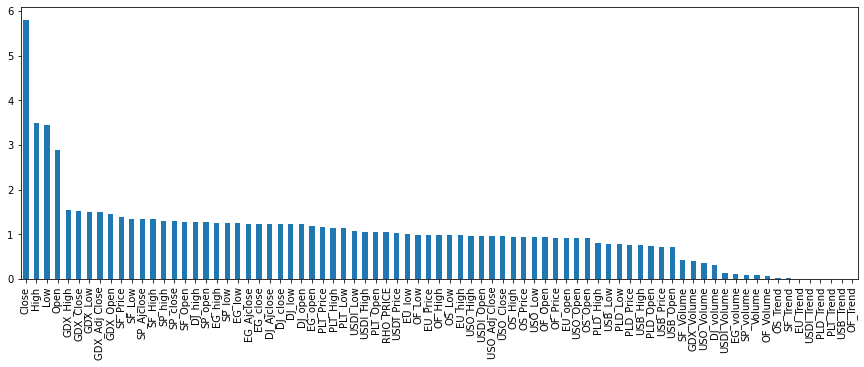

In [16]:
# plotting mutual_info as a barchart
mutual_info.plot.bar(figsize = (15, 5))

In [17]:
# selecting the top 20 percentile using SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile = 20)
selected_top_columns.fit(X_train.fillna(0), y_train)
X_train.columns[selected_top_columns.get_support()]

Index(['Open', 'High', 'Low', 'Close', 'SP_high', 'SP_close', 'SP_Ajclose',
       'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close'],
      dtype='object')

In [18]:
X_train = df[X_train.columns[selected_top_columns.get_support()]]

In [19]:
# applying same transformation to test data set
X_test.columns[selected_top_columns.get_support()]

Index(['Open', 'High', 'Low', 'Close', 'SP_high', 'SP_close', 'SP_Ajclose',
       'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close'],
      dtype='object')

In [20]:
X_test = df[X_test.columns[selected_top_columns.get_support()]]

In [21]:
# shape of test and train data after feature selection using correlation
X_train.shape, X_test.shape

((1718, 16), (1718, 16))

In [22]:
X_train

,Open,High,Low,Close,SP_high,SP_close,SP_Ajclose,SF_Price,SF_Open,SF_High,SF_Low,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close
0,154.740005,154.949997,151.710007,152.330002,123.199997,122.180000,105.441238,53604,54248,54248,52316,53.009998,53.139999,51.570000,51.680000,48.973877
1,154.309998,155.369995,153.899994,155.229996,122.949997,121.589996,105.597549,53458,53650,54030,52890,52.500000,53.180000,52.040001,52.680000,49.921513
2,155.479996,155.860001,154.360001,154.869995,122.320000,120.290001,104.468536,52961,53400,53400,52544,52.490002,52.549999,51.029999,51.169998,48.490578
3,156.820007,157.429993,156.580002,156.979996,124.139999,123.930000,107.629784,53487,52795,53575,52595,52.380001,53.250000,52.369999,52.990002,50.215282
4,156.979996,157.529999,156.130005,157.160004,124.360001,124.169998,107.838242,53148,53519,54184,52937,53.150002,53.430000,52.419998,52.959999,50.186852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,119.570000,120.139999,119.570000,120.019997,240.839996,234.339996,234.339996,37541,37325,37600,37305,20.700001,21.110001,20.650000,21.090000,21.090000
1714,120.620003,121.000000,119.570000,119.660004,246.179993,246.179993,246.179993,38253,37607,38489,37574,21.350000,21.400000,20.530001,20.620001,20.620001
1715,120.570000,120.900002,120.139999,120.570000,248.289993,248.070007,248.070007,38690,38274,38783,38081,20.840000,21.000000,20.700001,20.969999,20.969999
1716,120.800003,121.080002,120.720001,121.059998,251.399994,247.750000,247.750000,38706,38749,38880,38587,20.889999,21.020000,20.570000,20.600000,20.600000


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   SP_high        1718 non-null   float64
 5   SP_close       1718 non-null   float64
 6   SP_Ajclose     1718 non-null   float64
 7   SF_Price       1718 non-null   int64  
 8   SF_Open        1718 non-null   int64  
 9   SF_High        1718 non-null   int64  
 10  SF_Low         1718 non-null   int64  
 11  GDX_Open       1718 non-null   float64
 12  GDX_High       1718 non-null   float64
 13  GDX_Low        1718 non-null   float64
 14  GDX_Close      1718 non-null   float64
 15  GDX_Adj Close  1718 non-null   float64
dtypes: float64(12), int64(4)
memory usage: 214.9 KB
